In [ ]:
!pip install gluonnlp pandas tqdm   
!pip install mxnet
!pip install sentencepiece==0.1.91
!pip install transformers==4.8.2
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp39-cp39-linux_x86_64.whl size=680545 sha256=c1beb7148911a2e477d86e0bb66cf9a1694ba7c1617ebc693690ce39b303855d
  Stored in directory: /root/.cache/pip/wheels/47/17/70/b257bc53879a458c4bfcc900e89271aa8b4f19366a54bd2455
Successfully built gluonnlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.8 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-ju5rks6f/kobert-tokenizer_76779c76dbdf44d99314bf884d51fb69
  Running command git clone --filter=blob:none --quiet https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-ju5rks6f/kobert-tokenizer_76779c76dbdf44d99314bf884d51fb69
  Resolved https://github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
  Created wheel for kobert_tokenizer: filename=kobert_tokenizer-0.1-py3-none-any.whl size=4645 sha256=a62e9afa256538a94970480898fb2f3a2bf8ab1886fc68f1cba2a8e43fbcfcac
  Stored in directory: /tmp/pip-ephem-wheel-cache-xbh_9c0e/wheels/64/c4/82/d70d864682468fad0bf8269b0dfd88daf48f209be4c8ade164
Successfully built kobert_tokenizer


In [ ]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-eocaqx3c
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-eocaqx3c
  Resolved https://****@github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.9/881.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 92.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from kobert_tokenizer import KoBERTTokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel, vocab = get_pytorch_kobert_model()

Downloading:   0%|          | 0.00/371k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/244 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/432 [00:00<?, ?B/s]

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook
import pandas as pd

#transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup
from transformers import BertModel

#GPU 사용 시
device = torch.device("cuda:0")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.03_미니프로젝트4차_실습자료/data/train.csv'
data = pd.read_csv(data_path)

In [ ]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}

data = data.replace(label_dict)
data.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,0
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",0
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,0


In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer,vocab, max_len,
                 pad, pair):
   
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len,vocab=vocab, pad=pad, pair=pair)
        
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))
         

    def __len__(self):
        return (len(self.labels))

In [ ]:
# Setting parameters
max_len = 50
batch_size = 64
warmup_ratio = 0.1
num_epochs = 30
max_grad_norm = 1
log_interval = 10
learning_rate =  5e-5

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    data['text'], data['label'], test_size=0.2, 
    random_state=2023, stratify=data['label'])

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, 
    random_state=2023, stratify=y_train)

In [ ]:
dataset_train = []
for sen, label in zip(x_train, y_train):
    dataset_train.append((sen, str(label)))
dataset_val = []
for sen, label in zip(x_val, y_val):
    dataset_val.append((sen, str(label)))
dataset_test = []
for sen, label in zip(x_test, y_test):
    dataset_test.append((sen, str(label)))

In [ ]:
tk = tokenizer.tokenize
data_train = BERTDataset(dataset_train, 0, 1, tk, vocab, max_len, True, False)
data_val = BERTDataset(dataset_val, 0, 1, tk, vocab, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tk, vocab, max_len, True, False)

In [ ]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
val_dataloader = torch.utils.data.DataLoader(data_val, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=5,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device),return_dict=False)
        if self.dr_rate:
            out = self.dropout(pooler)
        else:
            out = pooler
        return self.classifier(out)

In [ ]:
#BERT 모델 불러오기
model = BERTClassifier(bertmodel, dr_rate=0.5).to(device)
 
#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss() # 다중분류를 위한 대표적인 loss func

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [ ]:
# Early Stopping
best_loss = 10 ** 9 # 매우 큰 값으로 초기값 가정
best_acc = 0
patience_limit = 7 # 몇 번의 epoch까지 지켜볼지를 결정
patience_check = 0 # 현재 몇 epoch 연속으로 loss 개선이 안되는지를 기록

train_history=[]
val_history=[]
train_loss_history=[]
val_loss_history=[]
for e in range(num_epochs):
    train_acc, train_loss = 0.0, 0.0
    val_acc, val_loss = 0.0, 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
         
        #print(label.shape,out.shape)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        train_loss += loss.data.cpu().numpy()
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
            # train_history.append(train_acc / (batch_id+1))
            # train_loss_history.append(loss.data.cpu().numpy())
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    print("epoch {} train loss {}".format(e+1, train_loss / (batch_id+1)))
    train_history.append(train_acc / (batch_id+1))
    train_loss_history.append(train_loss / (batch_id+1))
    
    model.eval()
    with torch.no_grad():
        for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(val_dataloader)):
            token_ids = token_ids.long().to(device)
            segment_ids = segment_ids.long().to(device)
            valid_length= valid_length
            label = label.long().to(device)
            out = model(token_ids, valid_length, segment_ids)
            val_acc += calc_accuracy(out, label)
            val_loss += loss_fn(out, label).data.cpu().numpy()
    print("epoch {} val acc {}".format(e+1, val_acc / (batch_id+1)))
    print("epoch {} val loss {}".format(e+1, val_loss / (batch_id+1)))
    val_history.append(val_acc / (batch_id+1))
    val_loss_history.append(val_loss / (batch_id+1))

    ### early stopping 여부를 체크하는 부분 ###
    if val_acc < best_acc: # acc 개선되지 않은 경우
        patience_check += 1

        if patience_check >= patience_limit: # early stopping 조건 만족 시 조기 종료
            break

    else: # acc가 개선된 경우
        best_acc = val_acc
        patience_check = 0
    # ### early stopping 여부를 체크하는 부분 ###
    # if val_loss > best_loss: # loss가 개선되지 않은 경우
    #     patience_check += 1

    #     if patience_check >= patience_limit: # early stopping 조건 만족 시 조기 종료
    #         break

    # else: # loss가 개선된 경우
    #     best_loss = val_loss
    #     patience_check = 0

  0%|          | 0/42 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 1.638793706893921 train acc 0.28125
epoch 1 batch id 11 loss 1.6286965608596802 train acc 0.2556818181818182
epoch 1 batch id 21 loss 1.5524346828460693 train acc 0.26860119047619047
epoch 1 batch id 31 loss 1.550248146057129 train acc 0.3059475806451613
epoch 1 batch id 41 loss 1.369111180305481 train acc 0.34146341463414637
epoch 1 train acc 0.3466223698781838
epoch 1 train loss 1.5122077039309911


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 1 val acc 0.4346798780487805
epoch 1 val loss 1.360314393043518


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 1.3582041263580322 train acc 0.421875
epoch 2 batch id 11 loss 1.315486192703247 train acc 0.40482954545454547
epoch 2 batch id 21 loss 1.2377985715866089 train acc 0.4375
epoch 2 batch id 31 loss 1.2687972784042358 train acc 0.47731854838709675
epoch 2 batch id 41 loss 1.236175775527954 train acc 0.4919969512195122
epoch 2 train acc 0.49578661406423036
epoch 2 train loss 1.243247628211975


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 2 val acc 0.5785823170731708
epoch 2 val loss 1.0842601776123046


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.997671902179718 train acc 0.609375
epoch 3 batch id 11 loss 0.9872592091560364 train acc 0.5994318181818182
epoch 3 batch id 21 loss 0.8673444390296936 train acc 0.6160714285714286
epoch 3 batch id 31 loss 0.8569162487983704 train acc 0.6496975806451613
epoch 3 batch id 41 loss 0.5161614418029785 train acc 0.6749237804878049
epoch 3 train acc 0.678234011627907
epoch 3 train loss 0.8892755139441717


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 3 val acc 0.7336128048780488
epoch 3 val loss 0.7499223709106445


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.622246265411377 train acc 0.828125
epoch 4 batch id 11 loss 0.5291532874107361 train acc 0.7428977272727273
epoch 4 batch id 21 loss 0.4382760226726532 train acc 0.7462797619047619
epoch 4 batch id 31 loss 0.7791506052017212 train acc 0.7746975806451613
epoch 4 batch id 41 loss 0.23286983370780945 train acc 0.7938262195121951
epoch 4 train acc 0.7959665697674418
epoch 4 train loss 0.615234857513791


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 4 val acc 0.7363567073170731
epoch 4 val loss 0.7605089128017426


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.47077906131744385 train acc 0.828125
epoch 5 batch id 11 loss 0.4016508460044861 train acc 0.8196022727272727
epoch 5 batch id 21 loss 0.4829218089580536 train acc 0.8095238095238095
epoch 5 batch id 31 loss 0.582387387752533 train acc 0.811491935483871
epoch 5 batch id 41 loss 0.2713932991027832 train acc 0.8182164634146342
epoch 5 train acc 0.8197760935769656
epoch 5 train loss 0.5176427892985798


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 5 val acc 0.7377286585365853
epoch 5 val loss 0.8624473929405212


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 6 batch id 1 loss 0.41591477394104004 train acc 0.875
epoch 6 batch id 11 loss 0.24534791707992554 train acc 0.8607954545454546
epoch 6 batch id 21 loss 0.2656156122684479 train acc 0.8623511904761905
epoch 6 batch id 31 loss 0.6190513372421265 train acc 0.8578629032258065
epoch 6 batch id 41 loss 0.0658736377954483 train acc 0.8673780487804879
epoch 6 train acc 0.8694282945736435
epoch 6 train loss 0.41952464339278994


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 6 val acc 0.734984756097561
epoch 6 val loss 0.8879224836826325


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 7 batch id 1 loss 0.37261006236076355 train acc 0.90625
epoch 7 batch id 11 loss 0.4189668893814087 train acc 0.8948863636363636
epoch 7 batch id 21 loss 0.494576096534729 train acc 0.8623511904761905
epoch 7 batch id 31 loss 0.47148531675338745 train acc 0.8618951612903226
epoch 7 batch id 41 loss 0.055707938969135284 train acc 0.8810975609756098
epoch 7 train acc 0.8828211517165007
epoch 7 train loss 0.37383362952442395


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 7 val acc 0.7742378048780487
epoch 7 val loss 0.8773088574409484


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 8 batch id 1 loss 0.3083733022212982 train acc 0.921875
epoch 8 batch id 11 loss 0.22118636965751648 train acc 0.9431818181818182
epoch 8 batch id 21 loss 0.16951686143875122 train acc 0.9375
epoch 8 batch id 31 loss 0.35483312606811523 train acc 0.9375
epoch 8 batch id 41 loss 0.04091087728738785 train acc 0.9428353658536586
epoch 8 train acc 0.9436427187153931
epoch 8 train loss 0.22084291368013337


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 8 val acc 0.7849847560975609
epoch 8 val loss 0.7828964531421662


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 9 batch id 1 loss 0.15617747604846954 train acc 0.953125
epoch 9 batch id 11 loss 0.1681235432624817 train acc 0.9573863636363636
epoch 9 batch id 21 loss 0.039835043251514435 train acc 0.9568452380952381
epoch 9 batch id 31 loss 0.2180769294500351 train acc 0.9566532258064516
epoch 9 batch id 41 loss 0.024139128625392914 train acc 0.9592225609756098
epoch 9 train acc 0.9590860326688816
epoch 9 train loss 0.16346545100566887


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 9 val acc 0.756859756097561
epoch 9 val loss 0.9545136094093323


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 10 batch id 1 loss 0.09403978288173676 train acc 0.96875
epoch 10 batch id 11 loss 0.22078388929367065 train acc 0.9588068181818182
epoch 10 batch id 21 loss 0.03946612402796745 train acc 0.9665178571428571
epoch 10 batch id 31 loss 0.17601466178894043 train acc 0.9647177419354839
epoch 10 batch id 41 loss 0.03720565140247345 train acc 0.9653201219512195
epoch 10 train acc 0.9650384136212625
epoch 10 train loss 0.13624251899974688


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 10 val acc 0.7846036585365853
epoch 10 val loss 0.9498443007469177


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 11 batch id 1 loss 0.08325722813606262 train acc 0.984375
epoch 11 batch id 11 loss 0.14040058851242065 train acc 0.9488636363636364
epoch 11 batch id 21 loss 0.029597900807857513 train acc 0.953125
epoch 11 batch id 31 loss 0.21424008905887604 train acc 0.9601814516129032
epoch 11 batch id 41 loss 0.021308626979589462 train acc 0.9657012195121951
epoch 11 train acc 0.9659641472868217
epoch 11 train loss 0.14439965097144955


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 11 val acc 0.7519817073170731
epoch 11 val loss 1.1240581274032593


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 12 batch id 1 loss 0.055857326835393906 train acc 0.984375
epoch 12 batch id 11 loss 0.1420832872390747 train acc 0.9616477272727273
epoch 12 batch id 21 loss 0.019231857731938362 train acc 0.9694940476190477
epoch 12 batch id 31 loss 0.15582141280174255 train acc 0.9722782258064516
epoch 12 batch id 41 loss 0.013284146785736084 train acc 0.977515243902439
epoch 12 train acc 0.9774968853820598
epoch 12 train loss 0.09978848456272058


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 12 val acc 0.7711128048780488
epoch 12 val loss 1.2356295585632324


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 13 batch id 1 loss 0.013145886361598969 train acc 1.0
epoch 13 batch id 11 loss 0.178900808095932 train acc 0.9701704545454546
epoch 13 batch id 21 loss 0.01781654730439186 train acc 0.9776785714285714
epoch 13 batch id 31 loss 0.17466339468955994 train acc 0.9778225806451613
epoch 13 batch id 41 loss 0.01678030751645565 train acc 0.9801829268292683
epoch 13 train acc 0.9801010520487264
epoch 13 train loss 0.08850847931933545


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 13 val acc 0.7822408536585366
epoch 13 val loss 1.0616947174072267


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 14 batch id 1 loss 0.013114715926349163 train acc 1.0
epoch 14 batch id 11 loss 0.07945159822702408 train acc 0.9815340909090909
epoch 14 batch id 21 loss 0.017949378117918968 train acc 0.9836309523809523
epoch 14 batch id 31 loss 0.10674860328435898 train acc 0.984375
epoch 14 batch id 41 loss 0.009933668188750744 train acc 0.9862804878048781
epoch 14 train acc 0.9866071428571429
epoch 14 train loss 0.0647374206178245


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 14 val acc 0.7728658536585366
epoch 14 val loss 1.1742502629756928


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 15 batch id 1 loss 0.009428069926798344 train acc 1.0
epoch 15 batch id 11 loss 0.18186691403388977 train acc 0.9801136363636364
epoch 15 batch id 21 loss 0.013864214532077312 train acc 0.984375
epoch 15 batch id 31 loss 0.07980233430862427 train acc 0.985383064516129
epoch 15 batch id 41 loss 0.007004480808973312 train acc 0.9858993902439024
epoch 15 train acc 0.9862351190476191
epoch 15 train loss 0.06240642028639004


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 15 val acc 0.7867378048780488
epoch 15 val loss 1.1728753089904784


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 16 batch id 1 loss 0.00618072971701622 train acc 1.0
epoch 16 batch id 11 loss 0.04539123550057411 train acc 0.984375
epoch 16 batch id 21 loss 0.007441731169819832 train acc 0.9888392857142857
epoch 16 batch id 31 loss 0.11402855068445206 train acc 0.9899193548387096
epoch 16 batch id 41 loss 0.009336593560874462 train acc 0.9904725609756098
epoch 16 train acc 0.9906994047619048
epoch 16 train loss 0.04823361006787136


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 16 val acc 0.7769817073170732
epoch 16 val loss 1.2785923957824707


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 17 batch id 1 loss 0.030232364311814308 train acc 0.984375
epoch 17 batch id 11 loss 0.021256141364574432 train acc 0.9872159090909091
epoch 17 batch id 21 loss 0.00556689128279686 train acc 0.9918154761904762
epoch 17 batch id 31 loss 0.07720128446817398 train acc 0.9924395161290323
epoch 17 batch id 41 loss 0.005612254608422518 train acc 0.993140243902439
epoch 17 train acc 0.9933035714285714
epoch 17 train loss 0.03720592306039873


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 17 val acc 0.7787347560975609
epoch 17 val loss 1.3095732927322388


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 18 batch id 1 loss 0.006401096936315298 train acc 1.0
epoch 18 batch id 11 loss 0.006489899940788746 train acc 0.9943181818181818
epoch 18 batch id 21 loss 0.0206037275493145 train acc 0.9947916666666666
epoch 18 batch id 31 loss 0.01065861526876688 train acc 0.9949596774193549
epoch 18 batch id 41 loss 0.006087847054004669 train acc 0.9954268292682927
epoch 18 train acc 0.9955357142857143
epoch 18 train loss 0.02489279940103491


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 18 val acc 0.775609756097561
epoch 18 val loss 1.3419869661331176


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 19 batch id 1 loss 0.005525805521756411 train acc 1.0
epoch 19 batch id 11 loss 0.005160099361091852 train acc 0.9971590909090909
epoch 19 batch id 21 loss 0.004750958178192377 train acc 0.9962797619047619
epoch 19 batch id 31 loss 0.005793214775621891 train acc 0.9964717741935484
epoch 19 batch id 41 loss 0.0038543762639164925 train acc 0.9965701219512195
epoch 19 train acc 0.9966517857142857
epoch 19 train loss 0.017770377996688087


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 19 val acc 0.7693597560975609
epoch 19 val loss 1.3505029678344727


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 20 batch id 1 loss 0.004829356446862221 train acc 1.0
epoch 20 batch id 11 loss 0.004823392257094383 train acc 0.9957386363636364
epoch 20 batch id 21 loss 0.004932998213917017 train acc 0.9962797619047619
epoch 20 batch id 31 loss 0.004884290508925915 train acc 0.9964717741935484
epoch 20 batch id 41 loss 0.0038169443141669035 train acc 0.9965701219512195
epoch 20 train acc 0.9966517857142857
epoch 20 train loss 0.01753193075724301


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 20 val acc 0.766234756097561
epoch 20 val loss 1.4617995500564576


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 21 batch id 1 loss 0.0033651632256805897 train acc 1.0
epoch 21 batch id 11 loss 0.004773793742060661 train acc 0.9957386363636364
epoch 21 batch id 21 loss 0.0032486431300640106 train acc 0.9977678571428571
epoch 21 batch id 31 loss 0.003460229141637683 train acc 0.9984879032258065
epoch 21 batch id 41 loss 0.002958630444481969 train acc 0.9988567073170732
epoch 21 train acc 0.9988839285714286
epoch 21 train loss 0.006758038725127422


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 21 val acc 0.766234756097561
epoch 21 val loss 1.5028519034385681


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 22 batch id 1 loss 0.0025179137010127306 train acc 1.0
epoch 22 batch id 11 loss 0.0033040938433259726 train acc 0.9985795454545454
epoch 22 batch id 21 loss 0.0031838538125157356 train acc 0.9992559523809523
epoch 22 batch id 31 loss 0.0028951060958206654 train acc 0.9994959677419355
epoch 22 batch id 41 loss 0.0022428736556321383 train acc 0.9996189024390244
epoch 22 train acc 0.9996279761904762
epoch 22 train loss 0.0035687697208708243


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 22 val acc 0.766234756097561
epoch 22 val loss 1.5155805706977845


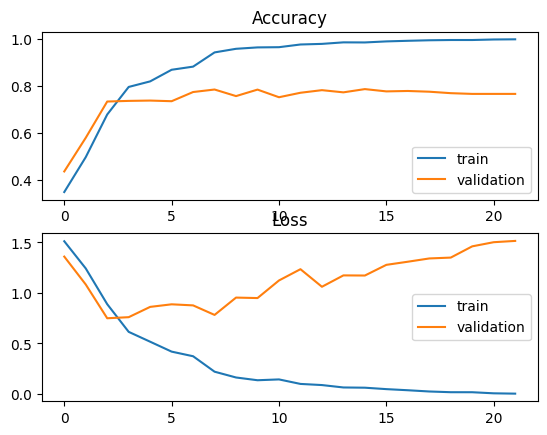

In [ ]:
plt.subplot(2, 1, 1)
plt.title('Accuracy')
plt.plot(train_history, label='train')
plt.plot(val_history, label='validation')
plt.legend()

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.plot(train_loss_history, label='train')
plt.plot(val_loss_history, label='validation')
plt.legend()
plt.show()

In [ ]:
model.eval()
test_acc = 0.0
y_pred = []
y_test = []
with torch.no_grad():
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
        y_test = np.hstack((y_test, label.cpu().numpy()))
        y_pred = np.hstack((y_pred, torch.max(out, 1)[1].cpu().numpy()))
print("test acc {}".format(test_acc / (batch_id+1)))

  0%|          | 0/12 [00:00<?, ?it/s]

test acc 0.8175712719298245


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[259  15  32  10   1]
 [  8 125   7   4   3]
 [ 26   5 107   8   0]
 [  7   3   4  98   0]
 [  0   3   0   0  17]]
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84       317
         1.0       0.83      0.85      0.84       147
         2.0       0.71      0.73      0.72       146
         3.0       0.82      0.88      0.84       112
         4.0       0.81      0.85      0.83        20

    accuracy                           0.82       742
   macro avg       0.81      0.83      0.82       742
weighted avg       0.82      0.82      0.82       742

0.815108243521483


In [23]:
reverse_label = {}
for k, v in label_dict.items():
    reverse_label[v] = k

In [24]:
def predict(predict_sentence):
    data = [predict_sentence, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tk, vocab, max_len, True, False)
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)
    
    model.eval()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length= valid_length
        label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)


        logits=out[0]
        logits = logits.detach().cpu().numpy()
        pred = np.argmax(logits)
        print(f'>> 분류 결과 : {reverse_label[pred]}')

In [25]:
predict("tokenization은 어떤 역할을 하나요?")

>> 분류 결과 : 웹


In [26]:
predict("성능은 어떻게 올릴까요....")

>> 분류 결과 : 코드2


In [27]:
predict('for i in range(10)')

>> 분류 결과 : 코드2


In [28]:
predict('<a href="www.google.com"> Google </a>')

>> 분류 결과 : 웹


In [29]:
predict("성능은 어떻게 올릴까요....")

>> 분류 결과 : 코드2


In [30]:
predict("엔 그램 을 구현하는 방법이 뭔가요?")

>> 분류 결과 : 웹


In [31]:
predict("N-Gram 을 구현하는 방법이 뭔가요?")

>> 분류 결과 : 이론


In [32]:
predict('N-Gram의 개념이 뭔가요?')

>> 분류 결과 : 이론


In [33]:
predict("출석 요청드립니다.")

>> 분류 결과 : 시스템 운영


In [ ]:
# save_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.03_미니프로젝트4차_실습자료/save_model/'
# torch.save(model, save_path + 'v7_kobert_50_0.9999.pt')